# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2203 Иванов Данила Дмитриевич
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла | <b>Алгоритм Дейкстры</b> | Алгоритм Беллмана-Форда | Алгоритм Джонсона | Алгоритм Левита | Алгоритм Йена


### Выполнение:

In [1]:
# Вариант 2 (№8 по списку)
import heapq
import numpy as np
import networkx as nx # Для графов
import matplotlib.pyplot as plt
from queue import Queue
class Graph: # Граф
    def __init__(self, vertices, adjacency_matrix = 0): # Инициализация
        self.V = vertices
        self.graph = []
        if adjacency_matrix != 0:
            for i in range(vertices):
                for j in range(vertices):
                    if adjacency_matrix[i][j] != 0:
                        self.graph.append((str(i), str(j), {'weight': adjacency_matrix[i][j]}))
    def AddEdge(self, s, e, w): # Добавление ребра
        self.graph.append([s, e, w])
    def Neighbours(self, node): # Получение соседних вершин
        neighbours = []
        for edge in self.graph:
            if edge[0] == node:
                neighbours.append((edge[1], edge[2]))
        return neighbours
    def Output(self, dist): # Вывод расстояний
        print("Расстояние до каждого узла\nУзел\t     Расстояние")
        for i in range(self.V):
            if dist[i] == float('inf'):
                print("% d \t\t %s" % (i, " 0"))
            else:
                print("% d \t\t % d" % (i, dist[i]))
    def Dijkstra(self, src): # Метод Дейкстры
        dist = [float('inf')] * self.V # Список расстояний
        dist[src] = 0
        pq = [(0, src)] # Очередь от 0 (начала)
        while pq: # Метод Дейкстры
            (curr_dist, curr_node) = heapq.heappop(pq) # Ближайшая вершина
            for (next_node, weight) in self.Neighbours(curr_node): # Обработка соседних вершин
                new_dist = curr_dist + weight
                if new_dist < dist[next_node]: # Поиск кратчайшего пути до вершины
                    dist[next_node] = new_dist
                    heapq.heappush(pq, (new_dist, next_node))
        return dist

In [2]:
text = open("Matrix.txt") # Ввод из файла
# Ввод из файла в формате "a b c", где a и b - вершины, а c - расстояние между ними, и так по каждой строке
# То есть строка "1 2 3" означает, что расстояние между вершинами 1 и 2 составляет 3
# Вершины начинать с нулевой (0)
n = int(input("Введите число вершин: "))
m = int(input("Введите число ребер: "))
graph = Graph(n)
G = nx.DiGraph()
for f in range(m):
    s, e, w = tuple(map(int, text.readline().split()))
    graph.AddEdge(s, e, w)
    G.add_edge(s, e, weight = w)

Введите число вершин: 6
Введите число ребер: 12


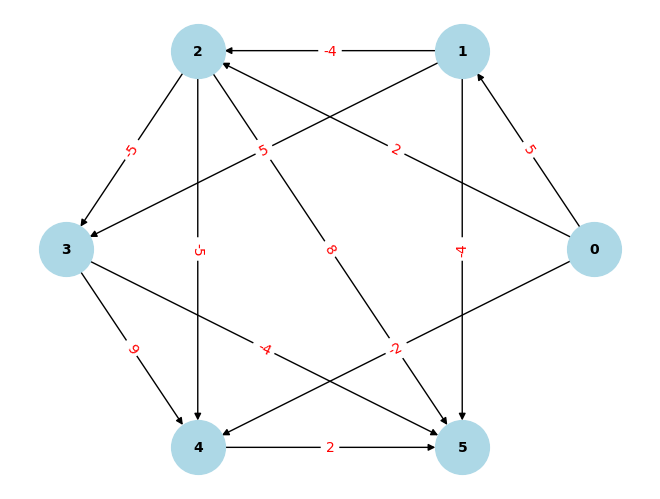

In [3]:
pos = nx.circular_layout(G) # Вершины
nx.draw(G, pos, with_labels = True, node_color='lightblue', node_size=1500, font_weight='bold', font_size=10)
edge_weight = nx.get_edge_attributes(G,'weight') # Расстояние
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight, font_color='red')
plt.show() # Граф

In [4]:
g = graph
print("Решение алгоритмом Дейкстры")
g.Output(g.Dijkstra(0))

Решение алгоритмом Дейкстры
Расстояние до каждого узла
Узел	     Расстояние
 0 		  0
 1 		  5
 2 		  1
 3 		 -4
 4 		 -4
 5 		 -8


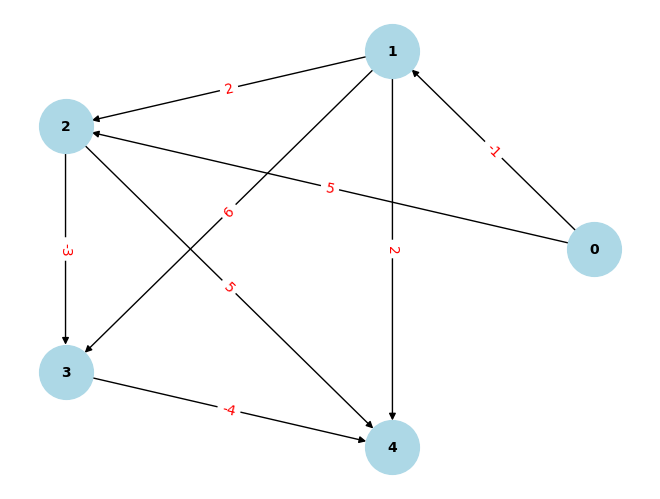

In [5]:
# Матрица смежности
Matrix = [[0, -1, 5, 0, 0],
          [0, 0, 2, 6, 2],
          [0, 0, 0, -3, 5],
          [0, 0, 0, 0, -4],
          [0, 0, 0, 0, 0]]
G1 = nx.DiGraph() # Инициализация графа
graph1 = Graph(len(Matrix))
for i in range(len(Matrix)): # Цикл по строкам матрицы смежности
    for j in range(len(Matrix)):
        if Matrix[i][j] != 0:
            graph1.AddEdge(i, j, Matrix[i][j])
            G1.add_edge(i, j, weight=Matrix[i][j])
pos = nx.circular_layout(G1)
edge_labels = {(i, j): d['weight'] for i, j, d in G1.edges(data=True)} # Расстояния
nx.draw(G1, pos, with_labels=True, node_color='lightblue', node_size=1500, font_weight='bold', font_size=10)
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels, font_color='red') # Граф
plt.show()

In [6]:
g1 = graph1
print("Решение алгоритмом Дейкстры")
g1.Output(g1.Dijkstra(0))

Решение алгоритмом Дейкстры
Расстояние до каждого узла
Узел	     Расстояние
 0 		  0
 1 		 -1
 2 		  1
 3 		 -2
 4 		 -6


### Вывод
В ходе данной лабораторной работы был разработан алгоритм Дейкстры - алгоритм по нахождению кратчайшего расстояния до вершины. Сложность алгоритма - O(V^2)

Был реализован графический вывод графа.

Была реализована возможность ввода из файла и через матрицу смежности.
